# Exploratory Data Analysis of England tour of India 2021

### Importing required libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#loading datsets
df_bat=pd.read_csv("batting.csv")
df_bowl=pd.read_csv("bowling.csv")
df_comb=pd.read_csv("combined.csv")

### Data Understanding

In [19]:
df_bat.head(3)

,Player,Matches,innings,notouts,runs,best,average,balls,strike_rate,hundreds,fifties,zeros,fours,sixes
0,JE Root,4,8,0,368,218,46.00,676,54.43,1,0,0,35,2
1,JC Buttler,1,2,0,54,30,27.00,91,59.34,0,0,0,7,1
2,BA Stokes,4,8,0,203,82,25.37,403,50.37,0,2,0,22,5


In [22]:
df_bat.shape,df_bowl.shape,df_comb.shape

((31, 14), (16, 13), (31, 12))

In [23]:
df_bowl.head()

,Player,Matches,innings,overs,maidens,runs,wickets,best,Average,economy,strike_rate,fives,tens
0,JE Root,4,6,45.0,7,141,6,5/8,23.50,3.13,45.0,1,0
1,BA Stokes,4,5,42.4,8,153,5,4/89,30.60,3.58,51.2,0,0
2,MM Ali,1,2,61.0,10,226,8,4/98,28.25,3.70,45.7,0,0
3,DM Bess,2,3,51.0,6,197,5,4/76,39.40,3.86,61.2,0,0
4,MJ Leach,4,7,161.0,26,517,18,4/54,28.72,3.21,53.6,0,0


In [24]:
df_comb.head()

,Player,Matches,runs_scored,highest,bat_avg,hundreds,fifties,overs,runs_given,wickets,best_fig,bw_avg
0,JE Root,4,368,218,46.00,1,0,45.0,141,6,5/8,23.50
1,JC Buttler,1,54,30,27.00,0,0,0.0,0,0,NaN,0.00
2,BA Stokes,4,203,82,25.37,0,2,42.4,153,5,4/89,30.60
3,DW Lawrence,3,149,50,24.83,0,1,0.0,0,0,NaN,0.00
4,MM Ali,1,49,43,24.50,0,0,61.0,226,8,4/98,28.25


In [43]:
print(df_bat.dtypes,"\n\n\n",df_bowl.dtypes)

Player          object
Matches          int64
innings          int64
notouts          int64
runs             int64
best             int64
average        float64
balls            int64
strike_rate    float64
hundreds         int64
fifties          int64
zeros            int64
fours            int64
sixes            int64
dtype: object 


 Player          object
Matches          int64
innings          int64
overs          float64
maidens          int64
runs             int64
wickets          int64
best            object
Average        float64
economy        float64
strike_rate    float64
fives            int64
tens             int64
dtype: object


### Analysis and Visualisation

#### Top 5 run scorers

In [48]:
run5=df_bat.sort_values(['runs'],ascending=False)[0:5]
run5

,Player,Matches,innings,notouts,runs,best,average,balls,strike_rate,hundreds,fifties,zeros,fours,sixes
0,JE Root,4,8,0,368,218,46.00,676,54.43,1,0,0,35,2
18,RG Sharma,4,7,1,345,161,57.50,595,57.98,1,1,0,43,5
19,RR Pant,4,6,1,270,101,54.00,321,84.11,1,2,0,32,10
2,BA Stokes,4,8,0,203,82,25.37,403,50.37,0,2,0,22,5
20,R Ashwin,4,6,0,189,106,31.50,368,51.35,1,0,0,24,2


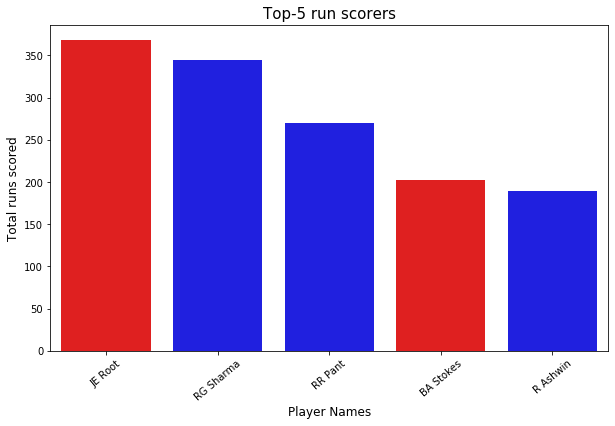

In [70]:
plt.figure(figsize=(10,6))
sns.barplot(data=run5,x='Player',y='runs',palette=['r','b','b','r','b'])
plt.title("Top-5 run scorers",fontsize=15)
plt.xlabel("Player Names",fontsize=12)
plt.ylabel("Total runs scored",fontsize=12)
plt.xticks(rotation=40)
plt.show()

#### Top 5 wicket takers

In [51]:
wic5=df_bowl.sort_values(['wickets'],ascending=False)[0:5]
wic5

,Player,Matches,innings,overs,maidens,runs,wickets,best,Average,economy,strike_rate,fives,tens
9,R Ashwin,4,8,188.1,33,471,32,6/61,14.71,2.50,35.2,3,0
10,AR Patel,3,6,27.4,27,286,27,6/38,10.59,2.24,28.3,4,1
4,MJ Leach,4,7,161.0,26,517,18,4/54,28.72,3.21,53.6,0,0
2,MM Ali,1,2,61.0,10,226,8,4/98,28.25,3.70,45.7,0,0
6,JM Anderson,3,4,65.5,31,127,8,3/17,15.87,1.92,49.3,0,0


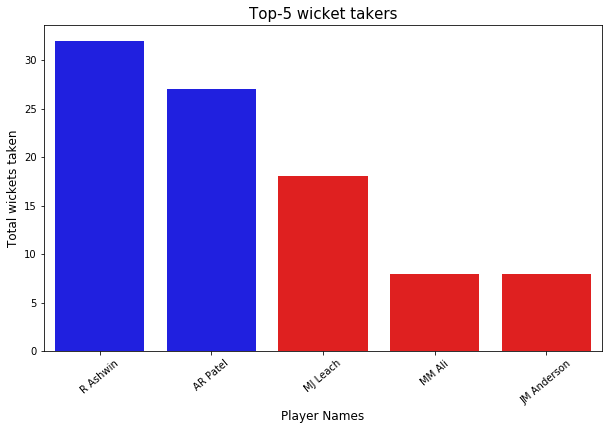

In [71]:
plt.figure(figsize=(10,6))
sns.barplot(data=wic5,x='Player',y='wickets',palette=['b','b','r','r','r'])
plt.title("Top-5 wicket takers",fontsize=15)
plt.xlabel("Player Names",fontsize=12)
plt.ylabel("Total wickets taken",fontsize=12)
plt.xticks(rotation=40)
plt.show()

#### Best All-round performers

In [88]:
allround=df_comb[(df_comb['bat_avg']>12)&((df_comb['bw_avg']<30)&(df_comb['bw_avg']>0))]

In [89]:
allround

,Player,Matches,runs_scored,highest,bat_avg,hundreds,fifties,overs,runs_given,wickets,best_fig,bw_avg
0,JE Root,4,368,218,46.00,1,0,45.0,141,6,5/8,23.50
4,MM Ali,1,49,43,24.50,0,0,61.0,226,8,4/98,28.25
20,R Ashwin,4,189,106,31.50,1,0,188.1,471,32,6/61,14.71
25,AR Patel,3,55,43,13.75,0,0,27.4,286,27,6/38,10.59


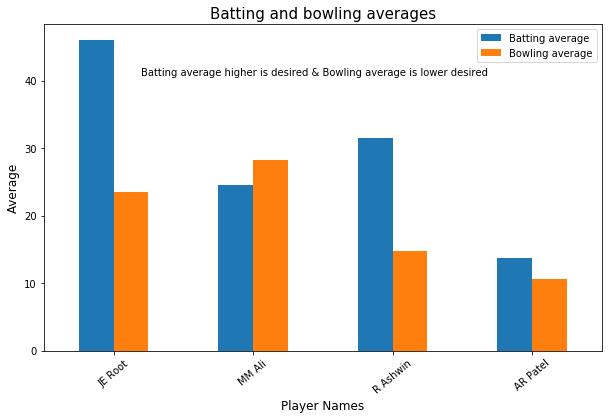

<Figure size 432x288 with 0 Axes>

In [167]:
allround.plot(kind='bar',x='Player',y=['bat_avg','bw_avg'],figsize=(10,6))
plt.title("Batting and bowling averages",fontsize=15)
plt.xlabel("Player Names",fontsize=12)
plt.ylabel("Average",fontsize=12)
plt.legend(['Batting average','Bowling average'])
plt.xticks(rotation=40)
plt.text(0.2,40.8,"Batting average higher is desired & Bowling average is lower desired")
plt.show()
#plt.savefig('allround.png')

#### Inference

Joe root has better batting average

Ashwin has better bowling average

both were most valuable players for their respective teams

#### Centuries and 5 wicket hauls

In [96]:
#centuries
cent=df_bat[df_bat['hundreds']>=1]
cent

,Player,Matches,innings,notouts,runs,best,average,balls,strike_rate,hundreds,fifties,zeros,fours,sixes
0,JE Root,4,8,0,368,218,46.0,676,54.43,1,0,0,35,2
18,RG Sharma,4,7,1,345,161,57.5,595,57.98,1,1,0,43,5
19,RR Pant,4,6,1,270,101,54.0,321,84.11,1,2,0,32,10
20,R Ashwin,4,6,0,189,106,31.5,368,51.35,1,0,0,24,2


In [97]:
#5 wicket hauls
five=df_bowl[df_bowl['fives']>=1]
five

,Player,Matches,innings,overs,maidens,runs,wickets,best,Average,economy,strike_rate,fives,tens
0,JE Root,4,6,45.0,7,141,6,5/8,23.50,3.13,45.0,1,0
9,R Ashwin,4,8,188.1,33,471,32,6/61,14.71,2.50,35.2,3,0
10,AR Patel,3,6,27.4,27,286,27,6/38,10.59,2.24,28.3,4,1


#### percentage runs and wickets for teams

In [128]:
#runs
eng_bat=df_bat[:17]
ind_bat=df_bat[17:]
ind_bat

,Player,Matches,innings,notouts,runs,best,average,balls,strike_rate,hundreds,fifties,zeros,fours,sixes
17,Washington Sundar,3,4,2,181,96,90.50,329,55.01,0,2,2,22,3
18,RG Sharma,4,7,1,345,161,57.50,595,57.98,1,1,0,43,5
19,RR Pant,4,6,1,270,101,54.00,321,84.11,1,2,0,32,10
20,R Ashwin,4,6,0,189,106,31.50,368,51.35,1,0,0,24,2
21,V Kohli,4,6,0,172,72,28.66,372,46.23,0,2,2,19,0
22,CA Pujara,4,6,0,133,73,22.16,332,40.06,0,1,1,16,0
23,Shubman Gill,4,7,1,119,50,19.83,217,54.83,0,1,2,15,3
24,AM Rahane,4,6,0,112,67,18.66,242,46.28,0,1,1,16,0
25,AR Patel,3,4,0,55,43,13.75,131,41.98,0,0,1,7,1
26,Mohammed Siraj,2,3,1,20,16,10.00,26,76.92,0,0,1,1,2


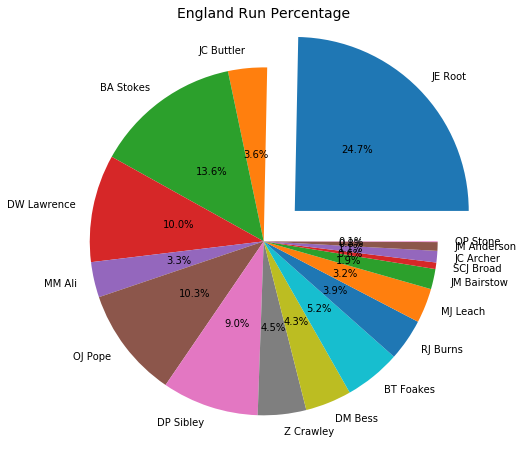

In [150]:
pie, ax = plt.subplots(figsize=[12,8])
labels = eng_bat['Player']
exp=[0.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
plt.pie(x=eng_bat['runs'], autopct="%.1f%%", explode=exp, labels=labels, pctdistance=0.5)
plt.title("England Run Percentage", fontsize=14)
plt.show()

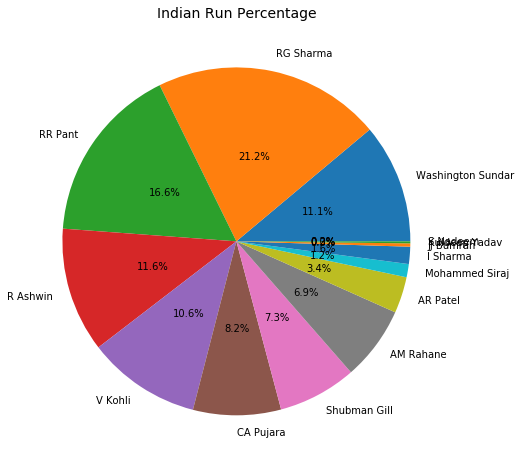

In [126]:
pie, ax = plt.subplots(figsize=[12,8])
labels = ind_bat['Player']
exp=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,]
plt.pie(x=ind_bat['runs'], autopct="%.1f%%", explode=exp, labels=labels, pctdistance=0.5)
plt.title("Indian Run Percentage", fontsize=14)
plt.show()

For India the run scoring is shared whereas England overdepend on Joe Root  

In [139]:
#wickets
eng_bowl=df_bowl[:8]
ind_bowl=df_bowl[8:]
ind_bowl

,Player,Matches,innings,overs,maidens,runs,wickets,best,Average,economy,strike_rate,fives,tens
8,Washington Sundar,3,5,38.4,3,130,2,1/1,65.00,3.36,116.0,0,0
9,R Ashwin,4,8,188.1,33,471,32,6/61,14.71,2.50,35.2,3,0
10,AR Patel,3,6,27.4,27,286,27,6/38,10.59,2.24,28.3,4,1
11,Mohammed Siraj,2,4,26.0,7,68,3,2/45,22.66,2.61,52.0,0,0
12,I Sharma,4,6,59.0,15,160,6,2/22,26.66,2.71,59.0,0,0
13,JJ Bumrah,2,3,48.0,10,129,4,3/84,32.25,2.68,72.0,0,0
14,Kuldeep Yadav,1,2,12.2,2,41,2,2/25,20.50,3.32,37.0,0,0
15,S Nadeem,1,2,59.0,6,233,4,2/66,58.25,3.94,88.5,0,0


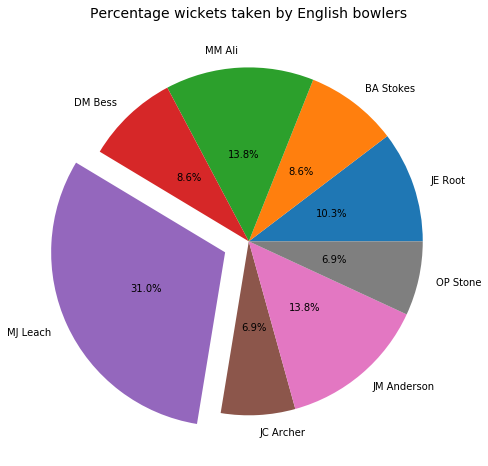

In [149]:
pie, ax = plt.subplots(figsize=[12,8])
labels = eng_bowl['Player']
exp=[0,0,0,0,0.15,0,0,0]
plt.pie(x=eng_bowl['wickets'], autopct="%.1f%%",explode=exp, labels=labels, pctdistance=0.5)
plt.title("Percentage wickets taken by English bowlers", fontsize=14)
plt.show()

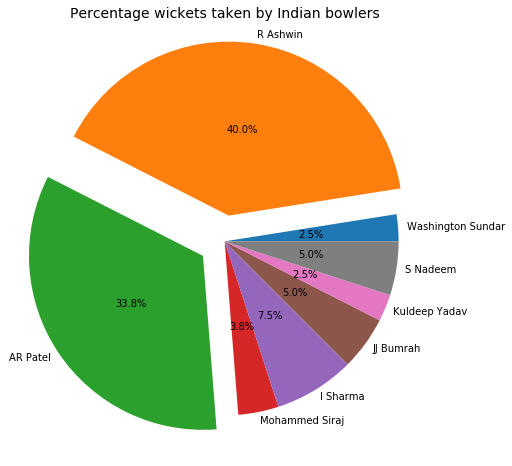

In [151]:
pie, ax = plt.subplots(figsize=[12,8])
labels = ind_bowl['Player']
exp=[0,0.15,0.15,0,0,0,0,0]
plt.pie(x=ind_bowl['wickets'], autopct="%.1f%%",labeldistance=1.05, explode=exp, labels=labels, pctdistance=0.5)
plt.title("Percentage wickets taken by Indian bowlers", fontsize=14)
plt.show()
#pie.savefig("wicketspercent.png")

#### Inference

Majority of the wickets are taken by spinners

Ashwin and Axar Patel took 73.8% of total wickets for India

while Jack Leach alone took 31% of total wickets for England